This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Unsupervized Learning</div>

Three Unsupervized Learning tasks are illustrated here:
1. [Dimensionality reduction](#dim)
2. [Clustering](#clust)
3. [Density estimation](#density)

# <a id="dim"></a> 1. Dimensionality reduction

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston['data'], boston['target']
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
from sklearn.decomposition import PCA

print(X.shape)

boston_pca = PCA()
boston_pca.fit(X)

(506, 13)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
boston_pca.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05, 6.65623182e-06, 1.56778461e-06,
       7.96814208e-08])

<BarContainer object of 13 artists>

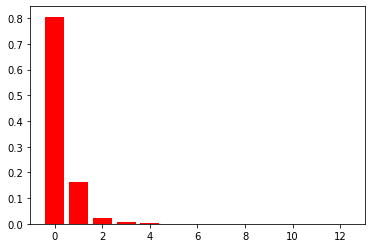

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), boston_pca.explained_variance_ratio_, color="r", align="center")

In [5]:
import numpy as np

np.sum(boston_pca.explained_variance_ratio_[:2])

0.9688751429772733

In [6]:
boston_pca = PCA(n_components=2)
boston_pca.fit(X)
X_proj = boston_pca.transform(X)

In [7]:
X_proj.shape

(506, 2)

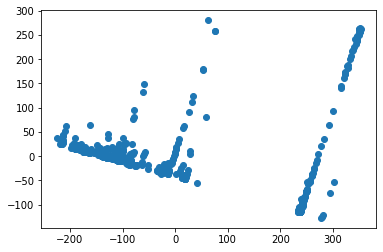

In [8]:
plt.scatter(X_proj[:,0],X_proj[:,1]);

In [9]:
boston_pca.components_

array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
        -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
         8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
         9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
         2.29433756e-02],
       [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
        -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
        -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
        -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
         5.76719865e-03]])

# <a id="clust"></a> 2. Clustering

In [10]:
from sklearn.cluster import KMeans
boston_kmeans = KMeans(n_clusters=2)
boston_kmeans.fit(X_proj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

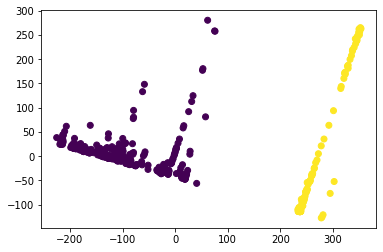

In [11]:
boston_kmeans2 = KMeans(n_clusters=2)
boston_kmeans2.fit(X)
y_pred  =boston_kmeans2.predict(X)
plt.scatter(X_proj[:,0], X_proj[:,1], c=y_pred);

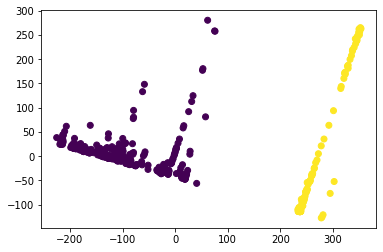

In [12]:
y_pred = boston_kmeans.predict(X_proj)
plt.scatter(X_proj[:,0], X_proj[:,1], c=y_pred);

See this [example](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) for a great comparison.

# <a id="density"></a> 3. Density estimation

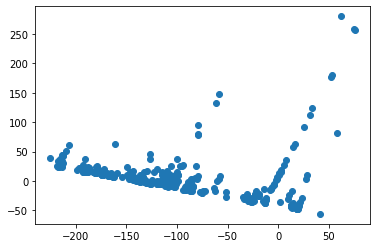

In [13]:
from sklearn import svm

boston_ocsvm = svm.OneClassSVM(gamma = 1e-3)
X1 = X_proj[y_pred==0,:]
plt.scatter(X1[:,0], X1[:,1])

In [14]:
boston_ocsvm.fit(X1)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

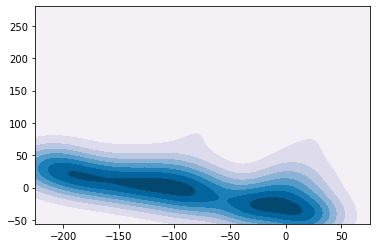

In [15]:
xmin = np.min(X1[:,0])
xmax = np.max(X1[:,0])
ymin = np.min(X1[:,1])
ymax = np.max(X1[:,1])

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

Z = boston_ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu);
#plt.scatter(X1[:,0], X1[:,1])

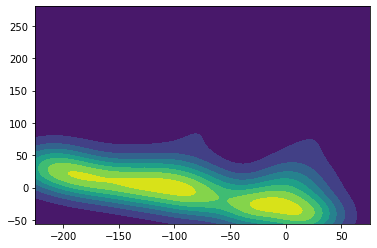

In [16]:
plt.contourf(xx, yy, Z)

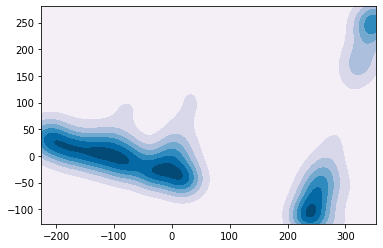

In [17]:
boston_ocsvm = svm.OneClassSVM(gamma = 1e-3)

boston_ocsvm.fit(X_proj)

xmin = np.min(X_proj[:,0])
xmax = np.max(X_proj[:,0])
ymin = np.min(X_proj[:,1])
ymax = np.max(X_proj[:,1])

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

Z = boston_ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu);